In [1]:
import os
os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

import sys
sys.path.append('..')

from datetime import datetime

import pandas as pd
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.compute as pc

from bizdays import Calendar

import brasa

In [2]:
man = brasa.CacheManager()

In [3]:
ds = brasa.get_dataset("b3-equity-volatility-surface")

In [4]:
ds.schema

underlying: string
type: string
maturity_date: timestamp[us]
business_days: int64
current_days: int64
delta: int64
volatility: double
refdate: timestamp[us]
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 1274

In [5]:
df = ds.filter(pc.field("type") == "C").filter(pc.field("business_days") == 4).filter(pc.field("underlying") == "PETR4").to_table().to_pandas()
df

,underlying,type,maturity_date,business_days,current_days,delta,volatility,refdate
0,PETR4,C,2023-12-15,4,4,1,38.145158,2023-12-11
1,PETR4,C,2023-12-15,4,4,10,30.875862,2023-12-11
2,PETR4,C,2023-12-15,4,4,25,27.212797,2023-12-11
3,PETR4,C,2023-12-15,4,4,37,26.713143,2023-12-11
4,PETR4,C,2023-12-15,4,4,50,26.821053,2023-12-11
5,PETR4,C,2023-12-15,4,4,63,27.491578,2023-12-11
6,PETR4,C,2023-12-15,4,4,75,29.005609,2023-12-11
7,PETR4,C,2023-12-15,4,4,90,35.148594,2023-12-11
8,PETR4,C,2023-12-15,4,4,99,39.540167,2023-12-11


<Axes: xlabel='delta', ylabel='volatility'>

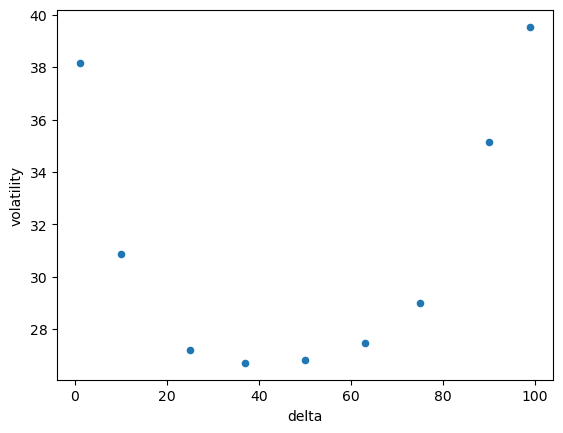

In [6]:
df.plot(x="delta", y="volatility", kind="scatter")

In [7]:
df = ds.filter(pc.field("business_days") == 4).filter(pc.field("underlying") == "PETR4").to_table().to_pandas()
df

,underlying,type,maturity_date,business_days,current_days,delta,volatility,refdate
0,PETR4,C,2023-12-15,4,4,1,38.145158,2023-12-11
1,PETR4,C,2023-12-15,4,4,10,30.875862,2023-12-11
2,PETR4,C,2023-12-15,4,4,25,27.212797,2023-12-11
3,PETR4,C,2023-12-15,4,4,37,26.713143,2023-12-11
4,PETR4,C,2023-12-15,4,4,50,26.821053,2023-12-11
5,PETR4,C,2023-12-15,4,4,63,27.491578,2023-12-11
6,PETR4,C,2023-12-15,4,4,75,29.005609,2023-12-11
7,PETR4,C,2023-12-15,4,4,90,35.148594,2023-12-11
8,PETR4,C,2023-12-15,4,4,99,39.540167,2023-12-11
9,PETR4,V,2023-12-15,4,4,-1,36.494653,2023-12-11


<Axes: xlabel='delta', ylabel='volatility'>

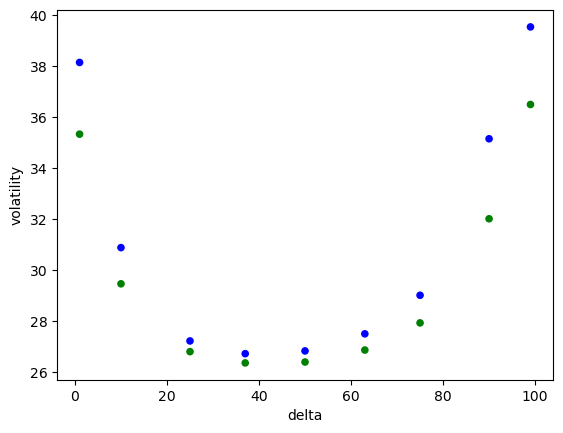

In [8]:
df["color"] = df["type"].apply(lambda x: "blue" if x == "C" else "green")
df.loc[df["type"] == "V", "delta"] = df.loc[df["type"] == "V", "delta"].apply(lambda x: 100 + x)
df.plot(x="delta", y="volatility", kind="scatter", c="color")

<Axes: xlabel='delta', ylabel='volatility'>

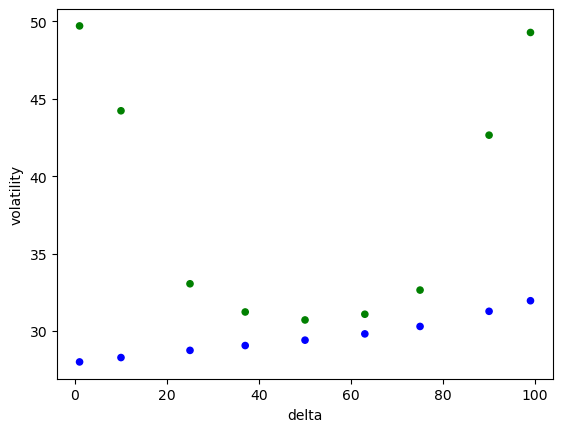

In [9]:
df = ds.filter(pc.field("business_days") == 4).filter(pc.field("underlying") == "USIM5").to_table().to_pandas()
df["color"] = df["type"].apply(lambda x: "blue" if x == "C" else "green")
df.loc[df["type"] == "V", "delta"] = df.loc[df["type"] == "V", "delta"].apply(lambda x: 100 + x)
df.plot(x="delta", y="volatility", kind="scatter", c="color")

<Axes: xlabel='delta', ylabel='volatility'>

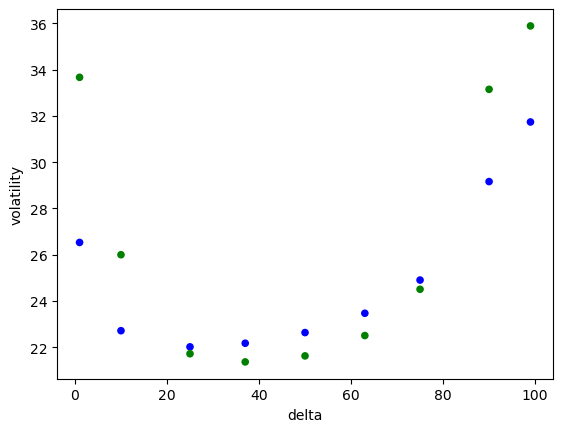

In [10]:
df = ds.filter(pc.field("business_days") == 4).filter(pc.field("underlying") == "ABEV3").to_table().to_pandas()
df["color"] = df["type"].apply(lambda x: "blue" if x == "C" else "green")
df.loc[df["type"] == "V", "delta"] = df.loc[df["type"] == "V", "delta"].apply(lambda x: 100 + x)
df.plot(x="delta", y="volatility", kind="scatter", c="color")

In [11]:
brasa.get_dataset("b3-equity-options").to_table().to_pandas()

,symbol,type,option_style,maturity_date,strike,theoretic_price,volatility,refdate
0,AAPLA436,C,E,2024-01-19,43.67,4.61,22.653025,2023-12-11
1,AAPLA440,C,A,2024-01-19,43.92,4.37,22.119383,2023-12-11
2,AAPLB440,C,A,2024-02-16,43.92,4.83,21.440052,2023-12-11
3,AAPLC440,C,A,2024-03-15,43.92,5.32,21.524126,2023-12-11
4,AAPLD440,C,A,2024-04-19,43.92,5.89,21.855696,2023-12-11
...,...,...,...,...,...,...,...,...
41839,ZAMPX450,V,E,2023-12-15,4.50,0.01,46.800263,2023-12-11
41840,ZAMPX500,V,E,2023-12-15,5.00,0.01,46.800263,2023-12-11
41841,ZAMPX510,V,E,2023-12-15,5.10,0.01,46.800263,2023-12-11
41842,ZAMPX600,V,E,2023-12-15,6.00,0.09,46.800263,2023-12-11
